In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy # 한글을 나누기 위해서 konlpy를 설치한다. (java 기반으로 만들어짐)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:12 https://developer.download.nvidia

In [ ]:
from konlpy.tag import Twitter # twitter 에서 okt로 바꼈지만 colab 환경에서는 twitter로 쓰임

twitter = Twitter()
twitter.pos("너무 졸리니잠을 자고 싶다.")

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('너무', 'Adverb'),
 ('졸리니', 'Verb'),
 ('잠', 'Noun'),
 ('을', 'Josa'),
 ('자고', 'Noun'),
 ('싶다', 'Verb'),
 ('.', 'Punctuation')]

In [ ]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
from konlpy.tag import Twitter
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

twitter = Twitter()

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


url주소에서 파일 불러오기

In [ ]:
#urllib.request.urlretrieve("https://raw.githubuserconten~",filename="ratings_train.txt")
#urllib.request.urlretrieve("https://raw.githubuserconten~",filename="ratings_train.txt")
# 길어서 url주소 단축

urllib.request.urlretrieve("https://bit.ly/3fTn9PP",filename="ratings_train.txt")
urllib.request.urlretrieve("https://bit.ly/33SGKxb",filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f71c1507470>)

In [ ]:
train_data = pd.read_table("ratings_train.txt")
test_data = pd.read_table("ratings_test.txt")

In [ ]:
train_data

id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[150000 rows x 3 columns]

In [ ]:
test_data

id                                           document  label
0      6270596                                                굳 ㅋ      1
1      9274899                               GDNTOPCLASSINTHECLUB      0
2      8544678             뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0
3      6825595                   지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0
4      6723715  3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0
...        ...                                                ...    ...
49995  4608761          오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함      1
49996  5308387       의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO      0
49997  9072549                 그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다      0
49998  5802125     절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네      0
49999  6070594                                         마무리는 또 왜이래      0

[50000 rows x 3 columns]

In [ ]:
print('훈련용 리뷰 개수 : ',len(train_data)) #훈련용 리뷰 개수
print('테스트용 리뷰 개수 : ',len(test_data)) #테스트용 리뷰 개수

훈련용 리뷰 개수 :  150000
테스트용 리뷰 개수 :  50000


In [ ]:
# 중복제거
train_data['document'].nunique(),train_data['label'].nunique()
#총 150,000개의 샘플이 존재하는데 document열에서 중복되지않은 샘플이 몇개인지 label에서도 중복되지않은 샘플이 몇개인지 확인

(146182, 2)

In [ ]:
print("중복제거 하기 전 총 샘플의 수 : ",len(train_data))

중복제거 하기 전 총 샘플의 수 :  150000


In [ ]:
train_data.drop_duplicates(subset=['document'],inplace=True) # 중복 제거

In [ ]:
print("총 샘플의 수 : ", len(train_data))

총 샘플의 수 :  146183


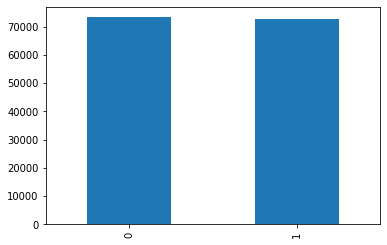

In [ ]:
train_data['label'].value_counts().plot(kind='bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name='count'))

   label  count
0      0  73342
1      1  72841


In [ ]:
print(train_data.isnull().values.any()) # Null값이 존재하는지 확인

True


In [ ]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [ ]:
train_data.loc[train_data.document.isnull()]

id document  label
25857  2172111      NaN      1

In [ ]:
train_data= train_data.dropna(how='any') # Null값이 존재하는 행을 제거
print(train_data.isnull().values.any()) # Null값이 존재하는지 확인

False


In [ ]:
print(len(train_data))

146182


In [ ]:
text = '''do!!! you expect...people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'''
print(text)

do!!! you expect...people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@


In [ ]:
text = '''do!!! you expect...people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'''
re.sub(r'[^a-zA-Z ]','',text) # 알파벳과 공백을 제외하고 모두 제거 (a-zA-Z 는 a부터 z까지 A부터 Z까지 공백도 포함해서)(^는 지정한 것을 제외하고 나머지를 뜻함)

'do you expectpeople to read the FAQ etc and actually accept hard atheism'

In [ ]:
train_data['document']

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 146182, dtype: object

In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # ㄱ부터ㅎ까지 ㅏ부터ㅣ까지 가 부터 힣 까지를 제외한 나머지를 공백으로 대체
train_data['document']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                                         아 더빙 진짜 짜증나네요 목소리
1                                흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                                 교도소 이야기구먼 솔직히 재미는 없다평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
                                ...                        
149995                                      인간이 문제지 소는 뭔죄인가
149996                                           평점이 너무 낮아서
149997                        이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다
149998                           청춘 영화의 최고봉방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 146182, dtype: object

In [ ]:
train_data['document'].replace('',np.nan,inplace=True)
print(train_data.isnull().sum())

id            0
document    391
label         0
dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
train_data.loc[train_data.document.isnull()][:5]

id document  label
584   7117896      NaN      0
593   6478189      NaN      0
638   9364602      NaN      0
668   1600635      NaN      0
1559  6918082      NaN      1

In [ ]:
train_data = train_data.dropna(how='any')
print(len(train_data))

145791


In [ ]:
# test도 똑같이
test_data.drop_duplicates(subset=['document'],inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'].replace('',np.nan,inplace=True)
test_data = test_data.dropna(how='any')
print('전처리 후 테스트용 샘플의 개수:',len(test_data))

전처리 후 테스트용 샘플의 개수: 48995


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'] # 불용어(의미가 없는 단어)

In [ ]:
twitter.morphs("와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔", stem=True) # 토근화 - stem = 어근화 / ('차라리' 추가?)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
X_train = []
for sentence in train_data['document']:
  temp_X = []
  temp_X = twitter.morphs(sentence,stem=True) # 토근화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)

In [ ]:
print(X_train[:3])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [ ]:
X_test = []
for sentence in test_data['document']:
  temp_X = []
  temp_X = twitter.morphs(sentence,stem=True) # 토근화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)

In [ ]:
print(X_test[:3])

[['굳다', 'ㅋ'], ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'], ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]


In [ ]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '을': 3, '없다': 4, '이다': 5, '있다': 6, '좋다': 7, '너무': 8, '다': 9, '정말': 10, '되다': 11, '재밌다': 12, '적': 13, '만': 14, '같다': 15, '진짜': 16, '로': 17, '아니다': 18, '않다': 19, '점': 20, '에서': 21, '만들다': 22, '나오다': 23, '연기': 24, '것': 25, '평점': 26, '내': 27, '최고': 28, '그': 29, '나': 30, '안': 31, '인': 32, '스토리': 33, '생각': 34, '못': 35, '왜': 36, '드라마': 37, '게': 38, '감동': 39, '사람': 40, '보고': 41, '이렇다': 42, '말': 43, '고': 44, '아깝다': 45, '더': 46, '배우': 47, '때': 48, 'ㅋㅋ': 49, '아': 50, '감독': 51, '거': 52, '그냥': 53, '재미있다': 54, '요': 55, '재미': 56, '시간': 57, '내용': 58, '뭐': 59, '까지': 60, '중': 61, '주다': 62, '자다': 63, '하고': 64, '지루하다': 65, '재미없다': 66, '쓰레기': 67, '수': 68, '네': 69, '모르다': 70, '가다': 71, '들다': 72, '그렇다': 73, '싶다': 74, '지': 75, '작품': 76, '사랑': 77, '알다': 78, '하나': 79, '다시': 80, '마지막': 81, '볼': 82, '이건': 83, '정도': 84, '저': 85, '완전': 86, '오다': 87, 'ㅋ': 88, 'ㅠㅠ': 89, '많다': 90, '처음': 91, 'ㅋㅋㅋ': 92, '장면': 93, '액션': 94, '주인공': 95, '이렇게': 96, '안되다': 97, '걸': 98, '차다': 99, '나다': 100, '개': 101, '하': 1

In [ ]:
tokenizer.word_counts.items()

odict_items([('아', 4138), ('더빙', 573), ('진짜', 8312), ('짜증나다', 1010), ('목소리', 374), ('흠', 251), ('포스터', 572), ('보고', 4658), ('초딩', 422), ('영화', 50367), ('줄', 1241), ('오버', 142), ('연기', 6326), ('조차', 242), ('가볍다', 361), ('않다', 7722), ('너', 670), ('무재', 69), ('밓었', 1), ('다그', 75), ('래서', 20), ('보다', 41072), ('추천', 1183), ('다', 10105), ('교도소', 16), ('이야기', 2171), ('구먼', 11), ('솔직하다', 1203), ('재미', 3879), ('없다', 15572), ('평점', 6266), ('조정', 40), ('사이', 222), ('몬페', 2), ('그', 5670), ('익살스럽다', 9), ('돋보이다', 288), ('스파이더맨', 64), ('에서', 6981), ('늙다', 198), ('보이다', 1074), ('커스틴', 4), ('던스트', 2), ('너무나도', 206), ('이쁘다', 1034), ('막', 333), ('걸음', 20), ('마', 236), ('떼다', 151), ('세', 599), ('부터', 1717), ('초등학교', 116), ('학년', 121), ('생인', 6), ('살다', 1173), ('ㅋㅋㅋ', 2448), ('별', 1928), ('반개', 205), ('아깝다', 4419), ('움', 1053), ('원작', 1253), ('긴장감', 832), ('을', 23208), ('제대로', 796), ('살리다', 534), ('욕', 779), ('나오다', 6397), ('이응경', 8), ('길용우', 4), ('연', 882), ('기', 1974), ('생활', 126), ('몇', 697), ('년', 1991

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43752
등장 빈도가 2번 이하인 희귀 단어의 수: 24337
단어 집합에서 희귀 단어의 비율: 55.62488571950996
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8715872104872904


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 19417


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[51, 455, 17, 261, 660], [934, 458, 42, 603, 2, 215, 1450, 25, 962, 676, 20], [387, 2445, 1, 2316, 5672, 3, 223, 10]]


In [ ]:
print(X_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

NameError: ignored

In [ ]:
#빈 샘플제거
drop_train = [index for index,sentence in enumerate(X_train) if len(sentence) <1]

In [ ]:
#빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145380
145380


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 11.002187371027652


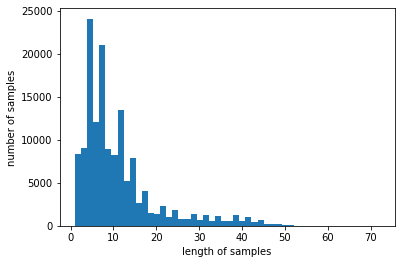

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.0830925849498


In [ ]:
X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#검증 데이터 손실(val_loss)이 증가하면,
#과적합 징후므로 검증 데이터 손실이 4회 증가하면
#학습을 조기 종료(Early stopping)합니다
#ModelCheckpoint를 사용하여 검증 데이터의
#정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

In [ ]:
from tensorflow.keras.preprocessing import sequence
print('시퀸스 패딩(sample * time)')
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)
print('X_train의 크기 : ',X_train.shape)
print('X_test의 크기 : ',X_test.shape)

시퀸스 패딩(sample * time)
X_train의 크기 :  (145380, 30)
X_test의 크기 :  (48995, 30)


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
1937/1939 [============================>.] - ETA: 0s - loss: 0.3903 - acc: 0.8232
Epoch 00001: val_acc improved from -inf to 0.84437, saving model to best_model.h5
1939/1939 [==============================] - 25s 13ms/step - loss: 0.3903 - acc: 0.8232 - val_loss: 0.3549 - val_acc: 0.8444
Epoch 2/15
1937/1939 [============================>.] - ETA: 0s - loss: 0.3286 - acc: 0.8561
Epoch 00002: val_acc improved from 0.84437 to 0.85428, saving model to best_model.h5
1939/1939 [==============================] - 24s 12ms/step - loss: 0.3285 - acc: 0.8562 - val_loss: 0.3394 - val_acc: 0.8543
Epoch 3/15
1935/1939 [============================>.] - ETA: 0s - loss: 0.3030 - acc: 0.8708
Epoch 00003: val_acc improved from 0.85428 to 0.85885, saving model to best_model.h5
1939/1939 [==============================] - 24s 12ms/step - loss: 0.3029 - acc: 0.8709 - val_loss: 0.3281 - val_acc: 0.8589
Epoch 4/15
1935/1939 [============================>.] - ETA: 0s - loss: 0.2846 - acc: 0.8808
E

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1532/1532 [==============================] - 4s 3ms/step - loss: 0.3348 - acc: 0.8549

 테스트 정확도: 0.8549


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = twitter.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('이 영화 꿀잼 ㅋㅋㅋ')

96.60% 확률로 긍정 리뷰입니다.



In [ ]:
sentiment_predict('이 영화 꿀잼인가?')

91.65% 확률로 긍정 리뷰입니다.



In [ ]:
sentiment_predict('하')

70.98% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('에라이 이 영화 머냐ㅋㅋㅋ')

95.32% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('이게 재미있냐?') # 의도 파악 예측 실패

79.82% 확률로 긍정 리뷰입니다.



In [ ]:
sentiment_predict('노잼')

98.99% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('이 영화는 도대체 무슨 내용의 영화지')

98.50% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict("이건 무슨 영화일까?")

98.09% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict("이건 재미있는것도 아니고 재미없는것도 아니다")

63.46% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict("시발 너무 재미있어")

85.11% 확률로 긍정 리뷰입니다.



In [ ]:
sentiment_predict("")